# El tratamiento de las varibles categóricas

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [19]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [20]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [21]:
#Dummy datasets sirve para dividir un varible categorica en ceros y uno
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender_") #Columna,Prefex
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City_") 

In [22]:
dummy_gender.head() #Viendo el dummy dataset del Gender

,Gender__Female,Gender__Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [23]:
dummy_city_tier.head() #Viendo el dummy dataset del City Tier

,City__Tier 1,City__Tier 2,City__Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [24]:
columns_names = df.columns.values.tolist()
columns_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [25]:
df_new = df[columns_names].join(dummy_gender) #Creando un nuevo Dataframe uniendo
#al inicial dataset

In [26]:
columns_names = df_new.columns.values.tolist()
columns_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender__Female',
 'Gender__Male']

In [32]:
df_new = df_new[columns_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender__Female,Gender__Male,City__Tier 1,City__Tier 2,City__Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [41]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender__Female", 
                "Gender__Male", "City__Tier 1", "City__Tier 2", 
                "City__Tier 3", "Record"] #Escogiendo las columnas con las
#que se trabajará

In [42]:
X = df_new[feature_cols] #Columnas seleccionadas para evaluar si
#seran parte del modelo como variables predictoras
print(type(X))
Y = df_new["Total Spend"] #Columna usada como Y (Lo que se quiere predecir)
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [43]:
lm = LinearRegression()
lm.fit(X,Y) #Creando el modelo y ajustando a las condiciones de X e Y
# X es del tipo DataFrame
# Y es del tipo Series

LinearRegression()

In [44]:
lm.intercept_ #Este valor es el Alpha

-79.41713030137362

In [45]:
lm.coef_ #Estos valores son los Betas

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [46]:
dic = dict(zip(feature_cols, lm.coef_))
dic

{'Monthly Income': 0.1475389804920575,
 'Transaction Time': 0.15494612549589679,
 'Gender__Female': -131.02501325554599,
 'Gender__Male': 131.02501325554582,
 'City__Tier 1': 76.76432601049524,
 'City__Tier 2': 55.13897430923264,
 'City__Tier 3': -131.90330031972778,
 'Record': 772.2334457445644}

In [47]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.15494612549589679),
 ('Gender__Female', -131.02501325554599),
 ('Gender__Male', 131.02501325554582),
 ('City__Tier 1', 76.76432601049524),
 ('City__Tier 2', 55.13897430923264),
 ('City__Tier 3', -131.90330031972778),
 ('Record', 772.2334457445644)]

In [48]:
lm.score(X,Y) #Funcion score(X,Y) permite obtener el R2

0.9179923586131016

El modelo puede ser escrito como
* Total_Spend = -79.41713030137362 + 0.1475389804920575 * Monthly Income
                    + 0.15494612549589679 * Transaction Time
                    - 131.02501325554599 * Gender__Female
                    + 131.02501325554582 * Gender__Male
                    + 76.76432601049524 * City__Tier 1
                    + 55.13897430923264 * City__Tier 2
                    - 131.90330031972778 * City__Tier 3
                    + 772.2334457445644 * Record

* Si es hombre y vive en CT1: Total_Spend = 79.41713030137362 +0.1475389804920575 * Monthly Income
                  + 0.15494612549589679 * Transaction Time
                    + 131.02501325554582 
                    + 76.76432601049524
                    + 772.2334457445644 * Record
* Si es hombre y vive en CT2: Total_Spend = 79.41713030137362 + 0.1475389804920575 * Monthly Income
                    + 0.15494612549589679 * Transaction Time
                    
                    + 131.02501325554582 
                    
                    + 55.13897430923264
                    
                    + 772.2334457445644 * Record

* Si es hombre y vive en CT3: Total_Spend = 79.41713030137362 + 0.1475389804920575 * Monthly Income
                    + 0.15494612549589679 * Transaction Time
                    
                    + 131.02501325554582 

                    - 131.90330031972778
                    + 772.2334457445644 * Record
.....

In [49]:
#Creando la columna "prediction" con el uso de los alpha y betas obtenidos
df_new["prediction"] = - 79.41713030137362 + 0.1475389804920575 * df_new["Monthly Income"] + 0.15494612549589679 * df_new["Transaction Time"] - 131.02501325554599 * df_new["Gender__Female"] + 131.02501325554582 * df_new["Gender__Male"] + 76.76432601049524 * df_new["City__Tier 1"] + 55.13897430923264 * df_new["City__Tier 2"] - 131.90330031972778 * df_new["City__Tier 3"] + 772.2334457445644 * df_new["Record"]

In [50]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender__Female,Gender__Male,City__Tier 1,City__Tier 2,City__Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [51]:
SSD = sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD #Suma de los cuadrados de las diferencias

1517733985.3408132

In [52]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE #Desviacion tipica de los residuos

803.1318809818157

In [53]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean #Promedio de la variable a predecir

6163.176415976714

In [54]:
error = RSE/sales_mean #Desciacion tipica/promedio
error*100

13.031135680294149

## Eliminar variables dummy redundantes
### Para variables categoricas

In [115]:
dummy_gender1 = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender1.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [116]:
dummy_city_tier1 = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier1.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [117]:
columns_names1 = df.columns.values.tolist()
df_new1 = df[columns_names1].join(dummy_gender1)
columns_names1 = df_new1.columns.values.tolist()
df_new1 = df_new1[columns_names1].join(dummy_city_tier1)
df_new1.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [118]:
feature_cols1 = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new1[feature_cols1]
Y = df_new1["Total Spend"]
lm1 = LinearRegression()
lm1.fit(X,Y)

LinearRegression()

In [119]:
print(lm1.intercept_)

-133.6778175464242


In [120]:
list(zip(feature_cols1, lm1.coef_))

[('Monthly Income', 0.14753898049205752),
 ('Transaction Time', 0.15494612549589676),
 ('Gender_Male', 262.05002651109606),
 ('City_Tier 2', -21.62535170126267),
 ('City_Tier 3', -208.66762633022333),
 ('Record', 772.2334457445638)]

In [121]:
lm1.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
* [('Monthly Income', 0.1475389804920575),
* ('Transaction Time', 0.15494612549589679),
*  ('Gender__Female', -131.02501325554599),
*  ('Gender__Male', 131.02501325554582),
*  ('City__Tier 1', 76.76432601049524),
*  ('City__Tier 2', 55.13897430923264),
*  ('City__Tier 3', -131.90330031972778),
*  ('Record', 772.2334457445644)]
 
 
 Coeficientes tras enmascarar las variables dummy pertinentes* 
* [('Monthly Income', 0.14753898049205752),
*  ('Transaction Time', 0.15494612549589676),
*  ('Gender_Male', 262.05002651109606),
*  ('City_Tier 2', -21.62535170126267),
*  ('City_Tier 3', -208.66762633022333),
*  ('Record', 772.2334457445638)]
 
Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02, despues -> 262.05 = (131.02 -(-131.02))
* Gender_Female: 
    * antes -> -131.02, despues -> 0 = 
* CT1: 
    * antes -> 76.76, despues -> 0
* CT2: 
    * antes -> 55.13, despues -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.9, despues -> -208.66 = (-131.9 - 76.76)

## OTRA FORMA DE HACER LA PREDICCION ES

In [62]:
df_new["prediction1"] = lm.predict(pd.DataFrame(df_new[feature_cols]))


In [63]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender__Female,Gender__Male,City__Tier 1,City__Tier 2,City__Tier 3,prediction,prediction1
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


# Transformación de variables para conseguir una relación no lineal

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [66]:
data_auto.shape #Dimensiones del dataframe

(406, 9)

Text(0.5, 1.0, 'CV vs MPG')

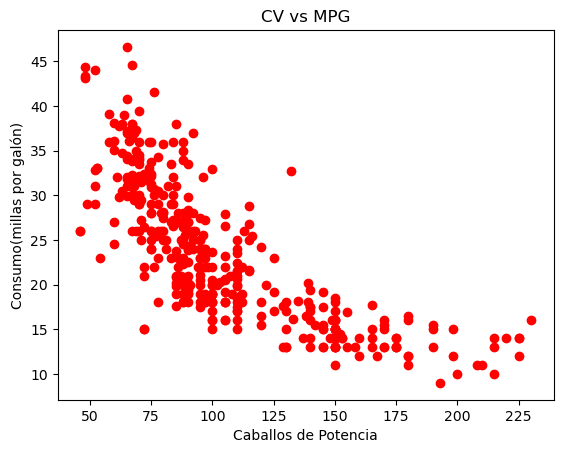

In [70]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo(millas por galón)")
plt.title("CV vs MPG") 

In [71]:
len(data_auto["mpg"].dropna())

398

In [72]:
len(data_auto["horsepower"].dropna())

400

## Modelo de regresión lineal
* mpg = a + b*horsepower

In [79]:
X = data_auto["horsepower"].fillna(np.mean(data_auto["horsepower"]))
Y = data_auto["mpg"].fillna(np.mean(data_auto["mpg"]))#fillna para rellenar
#los espacios vacios o nulos con el promedio

In [80]:
#Primera forma
lm = LinearRegression()
lm.fit(pd.DataFrame(X),Y)

LinearRegression()

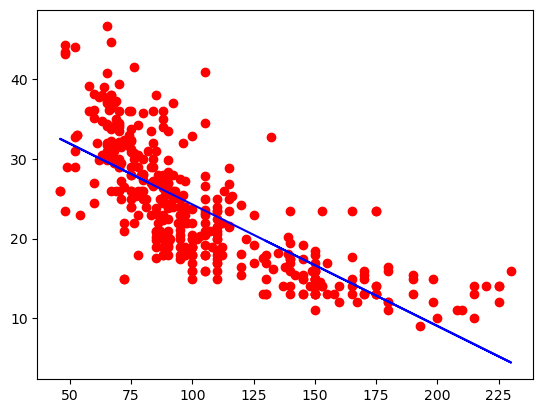

In [82]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(pd.DataFrame(X)), color = "blue")

In [86]:
lm.score(pd.DataFrame(X),Y) #R2 que mide la relacion entre los parametros

0.574653340645025

In [87]:
#Segunda forma - Esta no es la mejor
lm1 = LinearRegression()
lm1.fit(X[:, np.newaxis],Y)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8452\2324218902.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm1.fit(X[:, np.newaxis],Y)


LinearRegression()

In [88]:
type(X)

pandas.core.series.Series

In [89]:
type(Y)

pandas.core.series.Series

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8452\1411516178.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X, lm.predict(X[:, np.newaxis]), color = "blue")
C:\Users\Usuario\anaconda3\envs\Proyectos_Chris\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


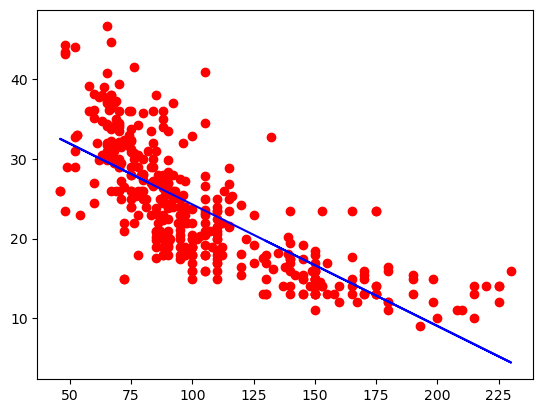

In [90]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X[:, np.newaxis]), color = "blue")

In [91]:
lm.score(pd.DataFrame(X), Y)

0.574653340645025

In [92]:
#CALCULANDO EL ERROR

SSD = np.sum((Y - lm.predict(pd.DataFrame(X)))**2) #Suma de los cuadrados de las diferencia
SSD

10315.75196006092

In [93]:
RSE = np.sqrt(SSD/(len(pd.DataFrame(X)) - 1))
RSE #Desviacion tipica de los residuos 

5.046879480825511

In [94]:
y_mean = np.mean(Y)
y_mean #Promedio

23.51457286432162

In [96]:
error = (RSE/y_mean)*100
error #Erros porcentual 

21.46277336163346

## Modelo de regresión cuadrático
* mpg = a + b*horsepower^2

In [97]:
X_data = X**2
X_data = pd.DataFrame(X_data)

In [98]:
lm1 = LinearRegression()
lm1.fit(X_data, Y)

LinearRegression()

In [100]:
lm1.score(X_data, Y)

0.4849887034823205

In [101]:
SSD = np.sum((Y - lm1.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

## Modelo de regresión lineal y cuadrático
* mpg = a + b*horsepower + c*horspower^2

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [103]:
poly = PolynomialFeatures(degree = 2) #Creando el polinomio de grado 2

In [104]:
X_data1 = poly.fit_transform(pd.DataFrame(X)) #Transformando y ajustando el 
# polinomio solo con la variables X

In [105]:
lm2 = linear_model.LinearRegression() #Ajustando con la variables X e Y
lm2 = lm2.fit(X_data1, Y)

In [106]:
lm2.score(X_data1, Y) #R2

0.6439066584257469

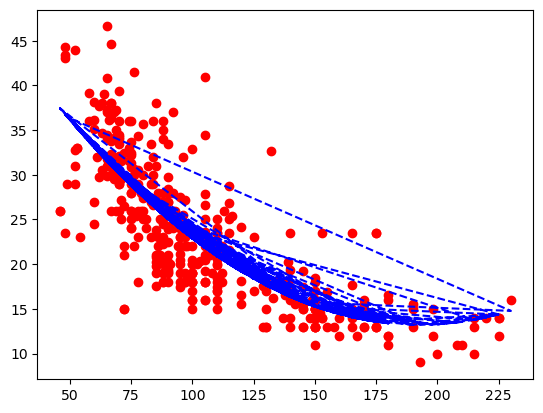

In [107]:
plt.plot(X, Y, "ro")
plt.plot(X, lm2.predict(X_data1), "b--")

In [108]:
lm2.intercept_ 

55.02619244708036

In [109]:
lm2.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.02619244708036 -0.43404318 * hp + 0.00112615 * hp^2

In [114]:
for d in range(2,7): #Con este bucle podemos validar con otras potencias
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(pd.DataFrame(X))
    lm3 = linear_model.LinearRegression()
    lm3 = lm3.fit(X_data, Y)
    r2 = lm3.score(X_data, Y)
    
    print("El polinomio de grado {} tiene un R2 igual a : {}".format(d, r2))
    print(lm3.intercept_)
    print(lm3.coef_)
    
    regression_validation( X_data, Y, lm3.predict(X_data)) #Funcion de abajo
    
    print("*"*50)

El polinomio de grado 2 tiene un R2 igual a : 0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502 RSE: 4.61778115803654 Y_mean: 23.51457286432162 error: 19.63795466190689
**************************************************
El polinomio de grado 3 tiene un R2 igual a : 0.6444678885560744
58.44877411191821
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855 RSE: 4.614140736300908 Y_mean: 23.51457286432162 error: 19.622473106036676
**************************************************
El polinomio de grado 4 tiene un R2 igual a : 0.6467674189704501
40.096643854798586
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491355 RSE: 4.5991947315797574 Y_mean: 23.51457286432162 error: 19.55891250126878
**************************************************
El polinomio de grado 5 tiene un R2 igual a : 0.6547512491257832
-40.69384023244233
[ 0.00000000e+00  4.00021431e+00 -7

In [113]:
def regression_validation(X_data, Y ,y_pred):
    SSD = np.sum((Y - y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: " + str(SSD), 
          "RSE: " + str(RSE), 
          "Y_mean: " + str(y_mean), 
          "error: " + str(error*100))

## El problema de los ouliers Datos muy alejados
### Datos que pueden distorsionar la eficacia del modelo

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
data_auto1 = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


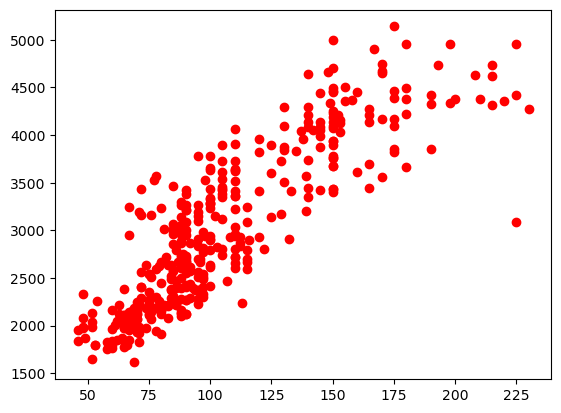

In [125]:
%matplotlib inline
plt.plot(data_auto1["horsepower"], data_auto["weight"], "ro")

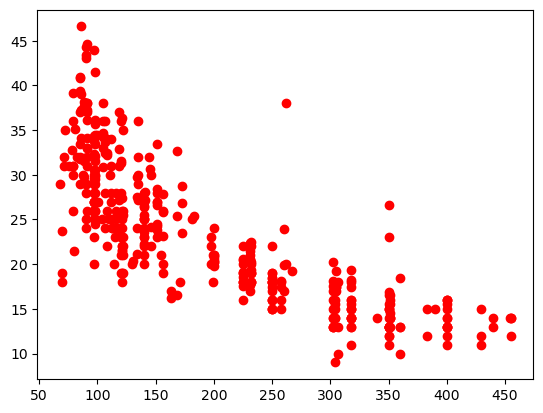

In [126]:
%matplotlib inline
plt.plot(data_auto1["displacement"], data_auto1["mpg"], "ro")

In [127]:
lm2 = LinearRegression()

In [128]:
X = data_auto1["displacement"].fillna(data_auto1["displacement"].mean())
X = pd.DataFrame(X)

In [129]:
Y = data_auto1["mpg"].fillna(data_auto1["mpg"].mean())

In [130]:
lm2.fit(X,Y)

LinearRegression()

In [131]:
lm2.score(X,Y)

0.6261049762826918

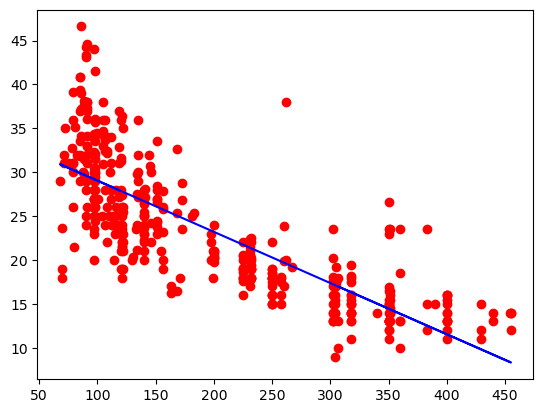

In [132]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm2.predict(X), color="blue")

In [133]:
#El OUTLIER - Filtrando
data_auto1[(data_auto1["displacement"]>250) & (data_auto1["mpg"]>35)] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [134]:
#El OUTLIER
data_auto1[(data_auto1["displacement"]>300) & (data_auto1["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [135]:
data_auto_clean = data_auto1.drop([395,258,305,372]) #Eliminando las filas 
#con datos outliers
data_auto_clean.shape

(402, 9)

In [136]:
X1 = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X1 = pd.DataFrame(X1)
X1.shape

(402, 1)

In [137]:
Y1 = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
Y1.shape

(402,)

In [138]:
lm4 = LinearRegression()
lm4.fit(X1,Y1)

LinearRegression()

In [139]:
lm4.score(X1,Y1) #Se mejoro el modelo con un R2 mayor 

0.6466514317531822

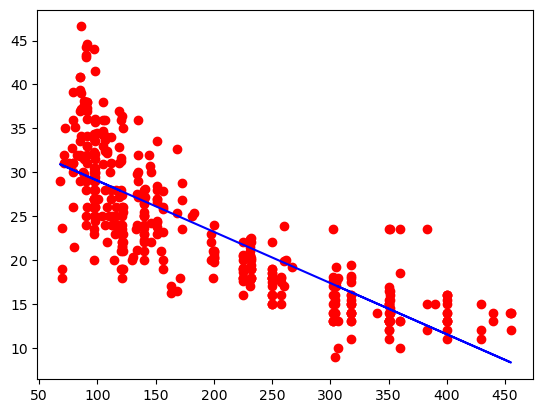

In [140]:
%matplotlib inline
plt.plot(X1, Y1, "ro")
plt.plot(X1, lm2.predict(X1), color="blue")

In [142]:
SSD1 = sum((Y1- lm4.predict(X1))**2)
SSD1 #Suma de los cuadrados de las diferencias

8487.961771190112

In [143]:
RSE = np.sqrt(SSD1/(len(X1)-1))
RSE

4.6007593895544945

In [144]:
Y1_mean = np.mean(Y1)
Y1_mean

23.479695431472088

In [145]:
error = RSE/Y1_mean
error*100

19.594629764181928